In [6]:
import matplotlib
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pickle
import numpy as np
import os
import IPS
from scipy.stats import norm

In [2]:
def P_exact(ratio,T,r,sigma):
    # ratio = S_0/B
    p = 1 - 2*r/sigma**2

    dp = (np.log(ratio) + (r - 0.5*sigma**2 )*T)/(sigma*np.sqrt(T))
    dn = (-np.log(ratio) + (r - 0.5*sigma**2)*T)/(sigma*np.sqrt(T))

    return 1 - (norm(0,1).cdf(dp) - (ratio**p)*norm(0,1).cdf(dn))

In [3]:
with open('results/.single/np20000_nf1_T1.0_ns20_sp80.0_sv1_sigma0.25_DVTrue_alpha18.5_18.5_1/output.pkl','rb') as pfile:
    res = pickle.load(pfile)

In [4]:
X0=res['X0']
Xn=res['Xn'][0]
Wn=res['Wn'][0]
alpha = res['alpha'][0]
norm_consts = res['norm_consts'][0]
startPrice = res['args'].startprice
T = res['args'].maturity
r = 0.06
sigma = res['args'].sigma0

In [17]:
barrierRatios = np.linspace(0.1,0.9,50)
pdef = []
pexact = []
for br in barrierRatios:
    barriers = br*startPrice
    default_prob,defcounts = IPS.estimator(X0,Xn,Wn,barriers,alpha,norm_consts)
    pdef.append(default_prob[1])
    pexact.append(P_exact(1/br,T,r,sigma))

<IPython.core.display.Javascript object>


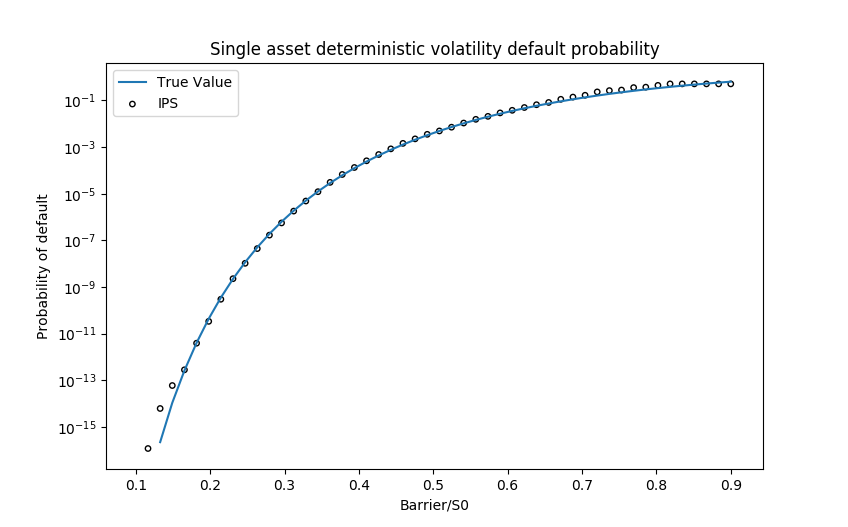

In [33]:
plt.semilogy(barrierRatios,pexact,label='True Value')
plt.scatter(barrierRatios,pdef,facecolors='none',edgecolors='black',s=15,label='IPS')
plt.xlabel('Barrier/S0')
plt.ylabel('Probability of default')
plt.title('Single asset deterministic volatility default probability')
plt.legend()
plt.show()